In [2]:
# --- CELL 1: SETUP & DATA LOADING ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display # Import display to show multiple tables

# 1. Define column names
# The Adult dataset does not have a header, so we define it manually based on documentation.
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# 2. Load data directly from the UCI Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, names=columns, skipinitialspace=True)

# 3. Quick Check
print("Dataset successfully loaded.")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n--- First 5 Rows ---")
display(df.head())

print("\n--- Last 5 Rows ---")
display(df.tail())

Dataset successfully loaded.
Rows: 32561, Columns: 15

--- First 5 Rows ---


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K



--- Last 5 Rows ---


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


--- 1. Missing Values Analysis ---


,Missing Count,% of Total
workclass,1836,5.64
occupation,1843,5.66
native-country,583,1.79


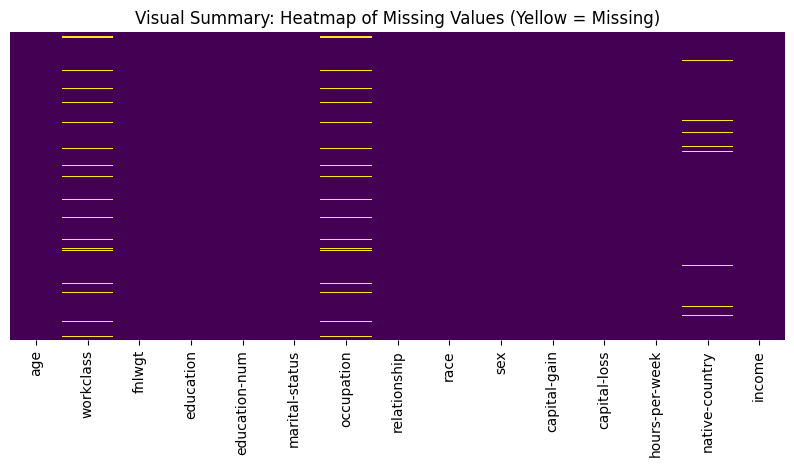


--- 2. Formatting & Inconsistent Labels ---
No whitespace formatting issues found.

--- 3. Redundancy Check (Education vs Education-Num) ---
Proof of Redundancy (1-to-1 Mapping):


,education,education-num
13,Preschool,1.0
3,1st-4th,2.0
4,5th-6th,3.0
5,7th-8th,4.0
6,9th,5.0



--- 4. Duplicate Entries ---
Total Duplicate Rows: 24
Sample of Duplicate Rows:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K


In [3]:
# --- CELL 2: Q1a DATA QUALITY ASSESSMENT

# A. MISSING VALUES ('?')
# ---------------------------------------------------------
print("--- 1. Missing Values Analysis ---")
# Replace '?' with NaN to detect them
df_quality = df.replace('?', np.nan)

# Quantify
missing_values = df_quality.isnull().sum()
missing_table = missing_values[missing_values > 0].to_frame(name='Missing Count')
missing_table['% of Total'] = round((missing_table['Missing Count'] / len(df)) * 100, 2)
display(missing_table) # Table 1: Missing Values

# Visual Summary
plt.figure(figsize=(10, 4))
sns.heatmap(df_quality.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visual Summary: Heatmap of Missing Values (Yellow = Missing)')
plt.show() # Visual 1: Heatmap


# B. FORMATTING ABNORMALITIES & INCONSISTENT LABELS
# ---------------------------------------------------------
print("\n--- 2. Formatting & Inconsistent Labels ---")
# Check for leading whitespace in categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
whitespace_issues = {}

for col in cat_cols:
    # Check if any value in the column starts with a space
    if df[col].str.startswith(' ').any():
        whitespace_issues[col] = "Leading Whitespace Detected"

if whitespace_issues:
    print("Formatting Issue Found: The following columns have values with leading spaces (e.g., ' Male'):")
    display(pd.DataFrame.from_dict(whitespace_issues, orient='index', columns=['Issue'])) # Table 2: Formatting Issues

    # Show concrete example of "Inconsistent Labels"
    print("\nExample of Inconsistent Labels in 'workclass':")
    print(df['workclass'].unique()[0:5]) # Shows values like ' State-gov'
else:
    print("No whitespace formatting issues found.")


# C. REDUNDANT VARIABLES
# ---------------------------------------------------------
print("\n--- 3. Redundancy Check (Education vs Education-Num) ---")
# Create a mapping table to prove they are identical
redundancy_map = df.groupby('education')['education-num'].mean().reset_index().sort_values('education-num')
print("Proof of Redundancy (1-to-1 Mapping):")
display(redundancy_map.head(5)) # Table 3: Redundancy Mapping


# D. DUPLICATE ENTRIES
# ---------------------------------------------------------
print("\n--- 4. Duplicate Entries ---")
duplicates = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicates}")

# Show a sample of duplicates if they exist
if duplicates > 0:
    print("Sample of Duplicate Rows:")
    display(df[df.duplicated()].head(3)) # Table 4: Sample Duplicates

In [4]:
# --- CELL 3: Q1b CLEANING PIPELINE

def clean_data(raw_df):
    """
    Systematic cleaning pipeline as per Q1(b):
    1. Standardises categorical labels (strips whitespace).
    2. Handles missing values using Mode Imputation.
    3. Removes redundant/irrelevant variables.
    4. Encodes categorical attributes for BI analysis.
    """
    # Create a copy to avoid SettingWithCopy warnings
    df_clean = raw_df.copy()

    # 1. Standardise Labels (Fixing Formatting Abnormalities)
    # The assessment found leading whitespace (e.g. " State-gov"). We strip it here.
    df_clean_obj = df_clean.select_dtypes(['object'])
    df_clean[df_clean_obj.columns] = df_clean_obj.apply(lambda x: x.str.strip())

    # 2. Handle Missing Values ('?')
    # Replace '?' with NaN first so we can fill them systematically
    df_clean.replace('?', np.nan, inplace=True)

    # Strategy: Impute with Mode (Most Frequent Value)
    # Justification: These are categorical variables; dropping rows would lose ~7% of data.
    for col in ['workclass', 'occupation', 'native-country']:
        mode_val = df_clean[col].mode()[0]
        df_clean[col] = df_clean[col].fillna(mode_val)

    # 3. Remove Redundant & Irrelevant Variables
    # 'education': Redundant (we keep 'education-num' which is numeric).
    # 'fnlwgt': Irrelevant (census weight, not useful for banking prediction).
    df_clean.drop(['education', 'fnlwgt'], axis=1, inplace=True)

    # 4. Encoding for Modelling
    # Binary Encoding for Target (Income) and Sex
    # We map <=50K to 0 and >50K to 1
    df_clean['income'] = df_clean['income'].map({'<=50K': 0, '>50K': 1})
    df_clean['sex'] = df_clean['sex'].map({'Male': 1, 'Female': 0})

    # One-Hot Encoding for nominal variables (no order)
    # Justification: Prevents the model from assuming 'Sales' > 'Clerical'.
    categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
    df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

    return df_clean

# Apply the pipeline
print("Applying cleaning pipeline...")
df_cleaned = clean_data(df)

# Export verified CSV for the final deliverable
df_cleaned.to_csv('adult_cleaned.csv', index=False)

# Verification
print("\n--- Pipeline Verification ---")
print(f"Original Shape: {df.shape}")
print(f"Cleaned Shape:  {df_cleaned.shape}")
print("File 'adult_cleaned.csv' has been saved successfully.")
print("\nFirst 5 rows of cleaned data:")
display(df_cleaned.head())

Applying cleaning pipeline...

--- Pipeline Verification ---
Original Shape: (32561, 15)
Cleaned Shape:  (32561, 82)
File 'adult_cleaned.csv' has been saved successfully.

First 5 rows of cleaned data:


,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,1,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,1,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,1,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,53,7,1,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## Q1 Justifications

### 1. Standardisation (Whitespace Removal)
* **Choice:** We stripped leading/trailing whitespace from all string columns.
* **Justification:** The quality assessment revealed inconsistent labels (e.g., `" State-gov"` vs `"State-gov"`). Without stripping, the model would treat identical categories as different inputs, creating noise in the analysis.

### 2. Imputation Strategy (Mode Imputation)
* **Choice:** We replaced missing values (`?`) in `workclass`, `occupation`, and `native-country` with the **Mode** (most frequent value).
* **Justification:** These are categorical variables, so we cannot calculate a mean. Dropping rows with missing data would have removed ~2,400 rows (~7% of the dataset). Using Mode imputation preserves the full dataset size (32,561 rows) which is crucial for training a robust BI model .

### 3. Variable Selection
* **Dropped `fnlwgt`:** This is a census demographic weight used for population estimation. It has no predictive power for individual credit scoring or income classification .
* **Dropped `education`:** We retained `education-num` instead. Keeping both creates **multicollinearity** (redundancy) because they represent the exact same information (e.g., "Bachelors" always equals 13).

### 4. Encoding Strategy (Why 15 columns became 82)
* **Choice:** We applied **One-Hot Encoding** to nominal variables (`occupation`, `race`, `native-country`).
* **Justification:** We avoided Label Encoding (1, 2, 3...) because categories like "Sales" and "Farming" have no natural rank order. One-Hot Encoding created a separate binary column for each category (which is why the column count increased to 82). This allows the model to treat each job type independently without assuming a false hierarchy .

## Q2: EDA section: Produce at least three BI-relevant dashboards, summary tables, or visualisations focused on understanding income-related patterns.

In [6]:
#1 : lets see income against education

# Group the dataset by numerical education level
income_by_edu = (
    df_cleaned.groupby("education-num")["income"]
    # Calculate the mean of the income variable for each education level
    # (interpreted as the proportion of individuals earning high income)
    .mean()
    # Convert the grouped result back into a DataFrame
    .reset_index()
    # Rename the column for clarity
    .rename(columns={"income": "proportion_high_income"})
)

# Display the resulting summary table
income_by_edu

,education-num,proportion_high_income
0,1,0.000000
1,2,0.035714
2,3,0.048048
3,4,0.061920
4,5,0.052529
5,6,0.066452
6,7,0.051064
7,8,0.076212
8,9,0.159509
9,10,0.190235


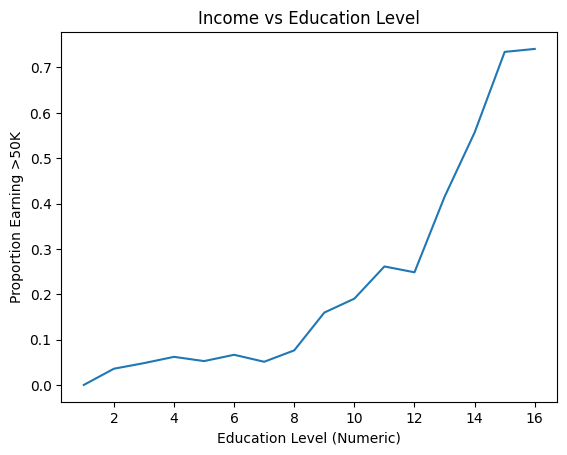

In [7]:
# Create a new figure for the plot
plt.figure()

# Plot education level against the proportion of individuals earning more than 50K
plt.plot(
    income_by_edu["education-num"],
    income_by_edu["proportion_high_income"]
)

# Label the x-axis with the numeric education level
plt.xlabel("Education Level (Numeric)")

# Label the y-axis with the proportion of high-income earners
plt.ylabel("Proportion Earning >50K")

# Add a title to describe the relationship shown in the plot
plt.title("Income vs Education Level")

# Display the plot
plt.show()

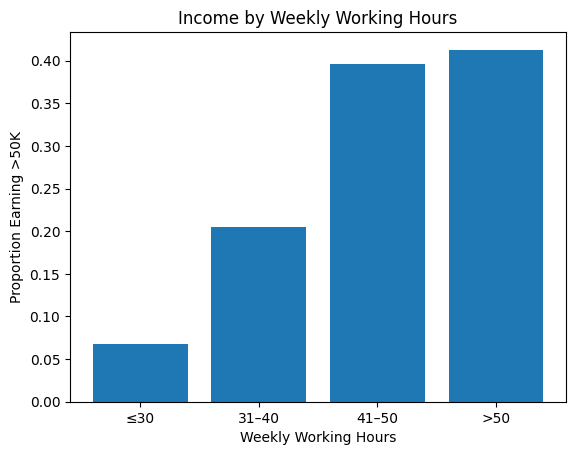

In [10]:
# Lets see also hours of work weekly against income

# Create binned categories for weekly working hours
df["hours_bin"] = pd.cut(
    df["hours-per-week"],
    bins=[0, 30, 40, 50, 100],
    labels=["≤30", "31–40", "41–50", ">50"]
)

# Convert income to binary (1 = >50K, 0 = <=50K)
df["income_num"] = (df["income"] == ">50K").astype(int)

# Group by hours worked and compute proportion earning >50K
income_by_hours = (
    df.groupby("hours_bin", observed=False)["income_num"]
    .mean()
    .reset_index()
)

# Plot
plt.figure()
plt.bar(income_by_hours["hours_bin"], income_by_hours["income_num"])
plt.xlabel("Weekly Working Hours")
plt.ylabel("Proportion Earning >50K")
plt.title("Income by Weekly Working Hours")
plt.show()


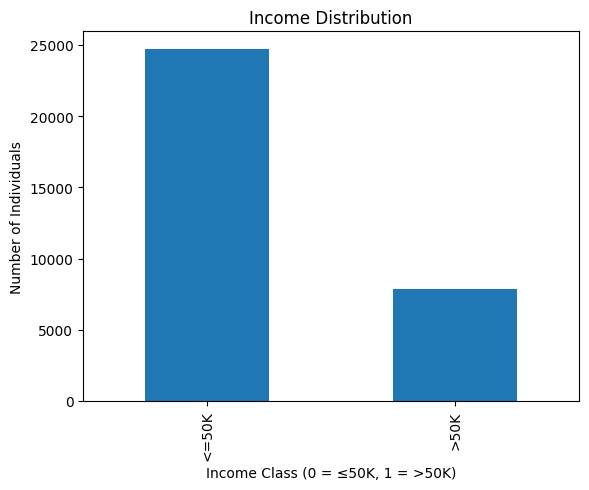

In [11]:
# 3: Income Distribution

# Import the plotting library
import matplotlib.pyplot as plt

# Count the number of occurrences of each income class and sort by the class value
income_counts = df["income"].value_counts().sort_index()

# Create a new figure for the bar chart
plt.figure()

# Plot the income class counts as a bar chart
income_counts.plot(kind="bar")

# Add a title to the chart
plt.title("Income Distribution")

# Label the x-axis with income classes (0 = ≤50K, 1 = >50K)
plt.xlabel("Income Class (0 = ≤50K, 1 = >50K)")

# Label the y-axis with the number of individuals in each class
plt.ylabel("Number of Individuals")

# Display the bar chart
plt.show()

# Interpretations section of Q2
## 1. Income vs education level:
### Insight:

From the visualizations, we can see that the proportion of individuals earning above the higher-income threshold increases sharply with higher education levels moreso those of mid-to-high numeric education categories.In our context,we can say that In Kenya, post-secondary and tertiary education (TVET, diploma, university) carry a clear wage premium. Formal-sector jobs in government, banking, telecom, and multinationals strongly favor those with higher education.

## implications:
1. Financial product design - Banks and SACCOs can have products that targets these people for example study-loans, savings accounts, good exchange rates e.t.c
2. Microcredit & lending risk - education can server as risk indicator where where higher education correlates with more stable income streams as shown by the visualizations
3. Labour-market profiling - We can see that investment in TVET and higher education as a pathway to upward income mobility would work well.
4. Regulatory reporting - Income stratification by education supports evidence-based reporting on human capital returns.


# 2. Income by Working Hours
### insights:
Individuals working more than 40 hours per week show quiet higher likelihood of earning above the income threshold. in Kenya, this reflects the labour structure where long-time workers like Managerial and executive roles, entrpreneurs e.t.c earn more compared to those in informal or casual employment

## Implications:
1. Financial product design - Lenders can create cash-flow–aligned repayment products for high-hour earners such as traders, transport operators, or professionals with irregular but higher incomes.

2. Microcredit & lending risk - we can use working hours as behavioural signal of income reliability.
3. Labour-market profiling - Supports segmentation between informal low-hour workers and higher-intensity formal or entrepreneurial labour.
4. Regulatory reporting - Highlights underemployment risks and informs labour inspections

# 3. Income Distribution

### Insights:
fewer individuals earn above the higher income threshold as we can see on the visualizations

## implications
1. Financial product design - Justifies mass-market products such as low-fee transaction accounts, mobile-based micro-savings, and nano-loans rather than premium-only banking.

2. Microcredit & lending risk - Emphasises the importance of alternative credit scoring (mobile money usage, repayment history) rather than income alone.
3. Labour-market profiling - Reinforces the need to expand formal employment opportunities and social protection coverage.

4. Regulatory reporting - Supports Central Bank of Kenya (CBK) and KNBS reporting on financial inclusion and income inequality.

